In [24]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data_paths = [Path(s) for s in ['./TEK0007.CSV', './TEK0009.CSV', './TEK0011.CSV']]

In [20]:
data = [pd.read_csv(data_path, usecols = [3,4], skiprows = 17, names = ['t', 'v']) for data_path in data_paths]

In [21]:
data

[          t      v
 0     0.068 -0.120
 1     0.072 -0.112
 2     0.076 -0.120
 3     0.080 -0.128
 4     0.084 -0.128
 ...     ...    ...
 2478  9.980 -0.072
 2479  9.984 -0.072
 2480  9.988 -0.064
 2481  9.992 -0.064
 2482  9.996 -0.072
 
 [2483 rows x 2 columns],
           t      v
 0     0.068  0.064
 1     0.072  0.040
 2     0.076  0.048
 3     0.080  0.056
 4     0.084  0.056
 ...     ...    ...
 2478  9.980  0.096
 2479  9.984  0.096
 2480  9.988  0.080
 2481  9.992  0.072
 2482  9.996  0.088
 
 [2483 rows x 2 columns],
           t      v
 0      0.17 -0.200
 1      0.18 -0.216
 2      0.19 -0.208
 3      0.20 -0.216
 4      0.21 -0.208
 ...     ...    ...
 2478  24.95 -0.896
 2479  24.96 -0.896
 2480  24.97 -0.896
 2481  24.98 -0.896
 2482  24.99 -0.896
 
 [2483 rows x 2 columns]]

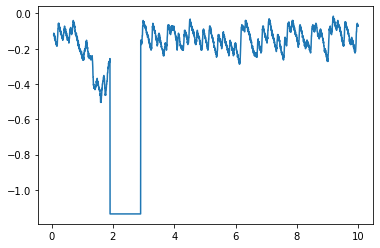

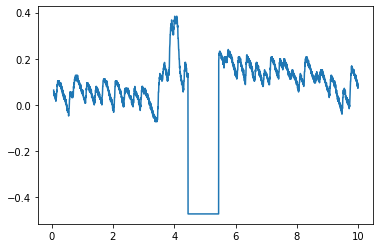

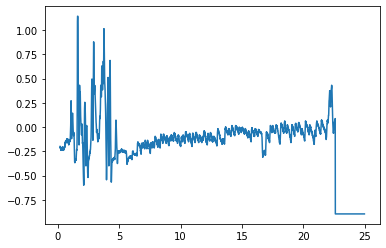

In [22]:
for d in data:
    plt.plot(d.t, d.v)
    plt.show()

In [36]:
def windowed_fft(signal, window):
    out = []
    ground = []
    for i in range(len(signal)//window + 1):
        ground.append(signal[i*window: (i+1)*window])
        out.append(np.fft.fft(ground[i]))
    return out, ground

fft, window = windowed_fft(data[0].v.to_numpy(), 100)

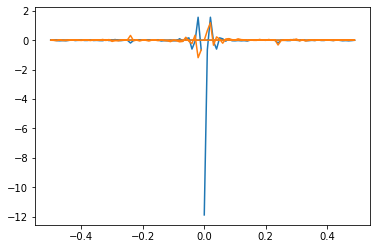

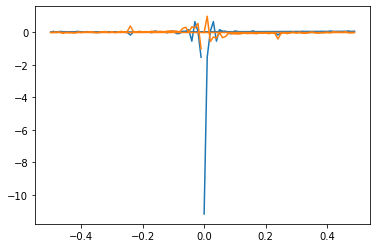

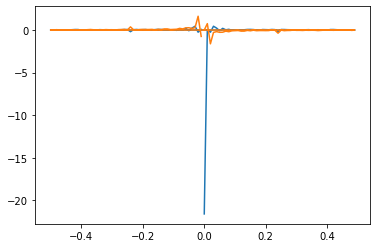

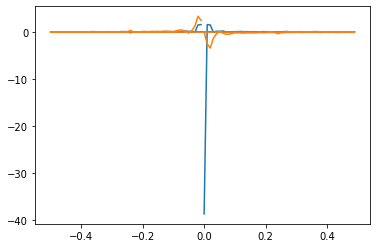

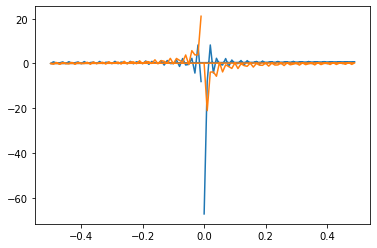

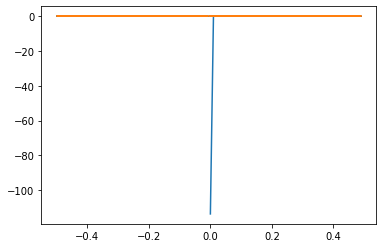

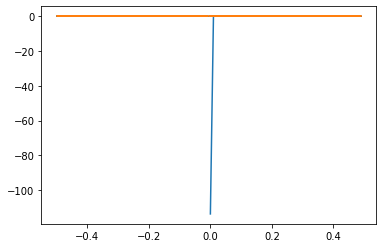

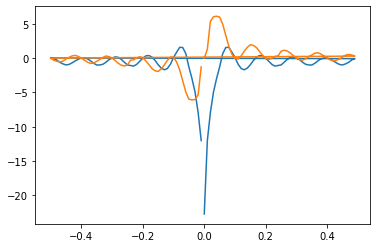

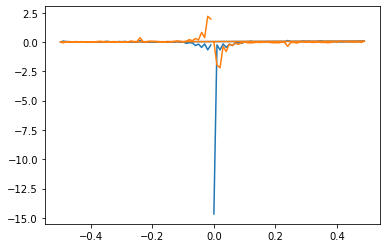

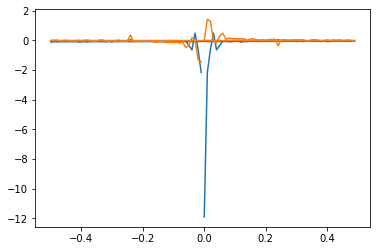

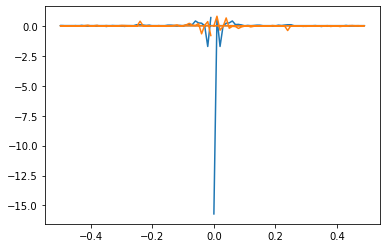

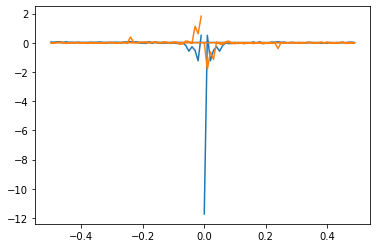

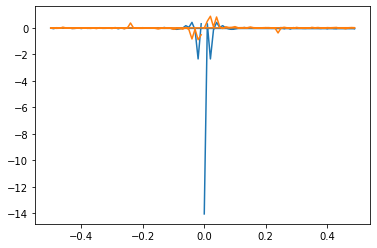

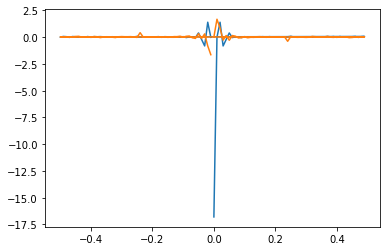

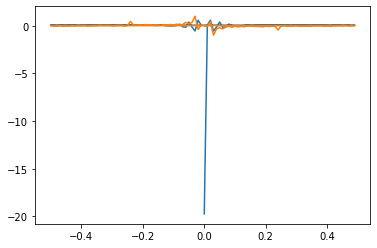

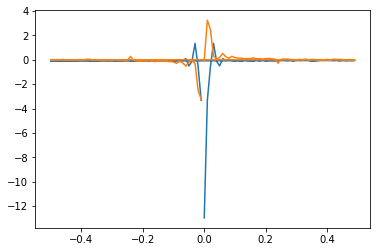

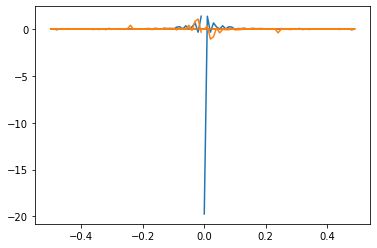

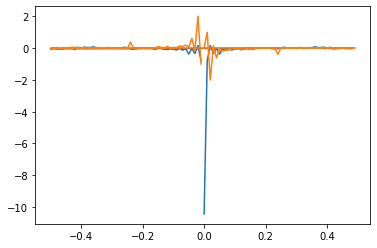

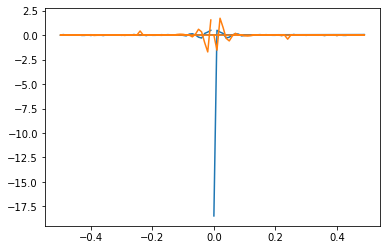

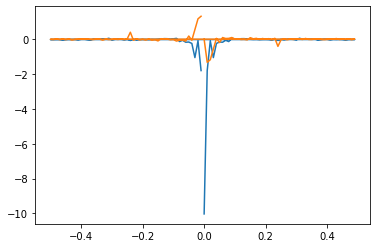

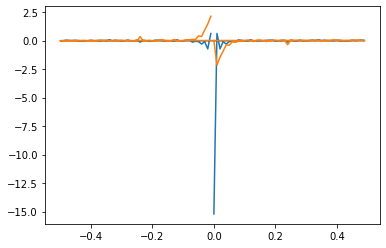

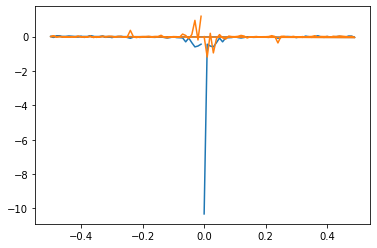

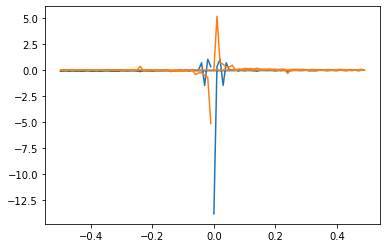

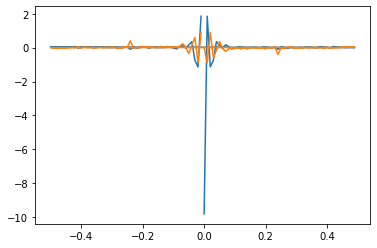

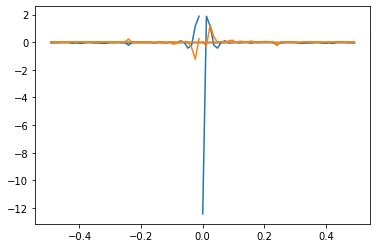

In [63]:

for f in fft:
    freq = np.fft.fftfreq(f.shape[-1])
    plt.plot(freq, f.real, freq, f.imag)
    plt.show()

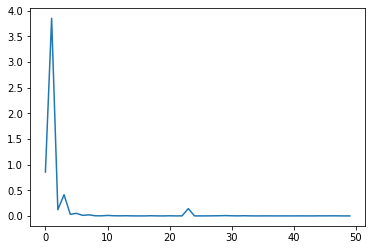

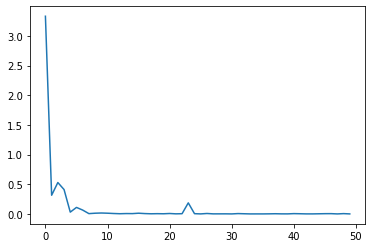

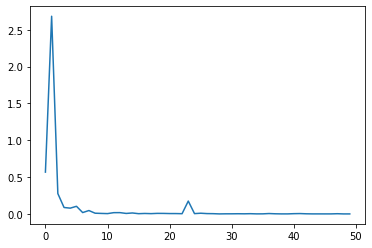

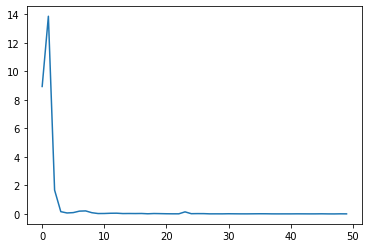

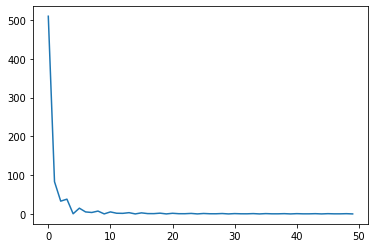

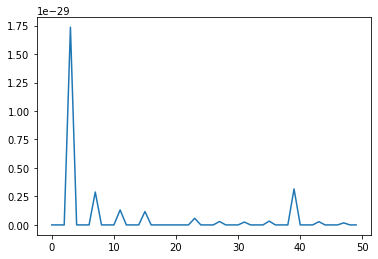

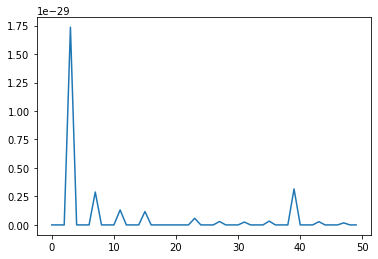

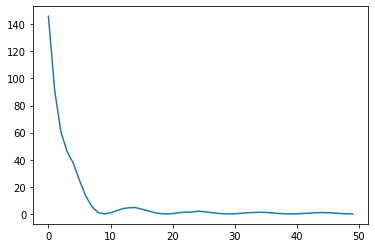

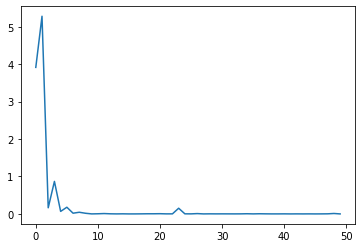

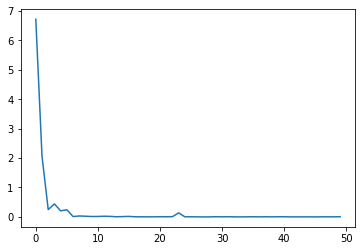

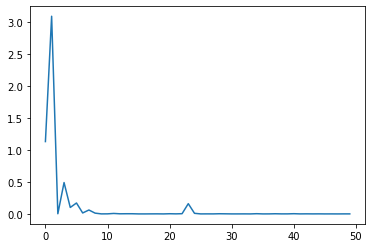

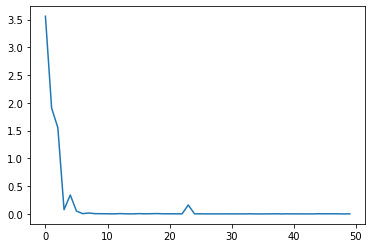

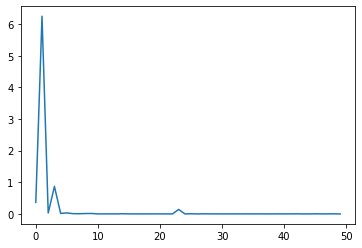

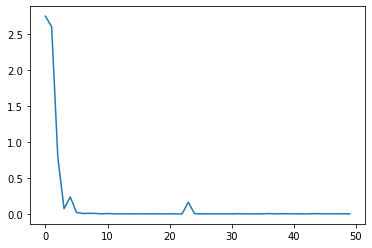

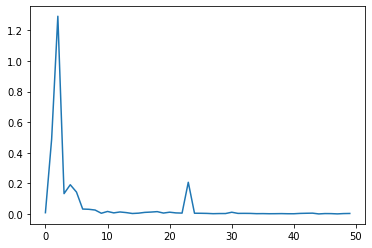

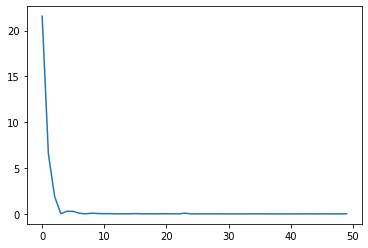

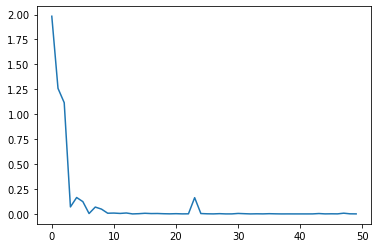

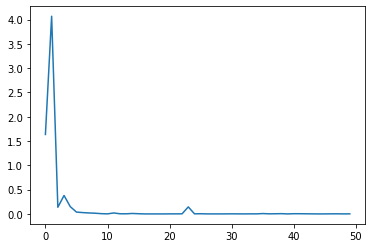

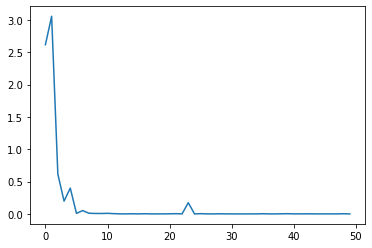

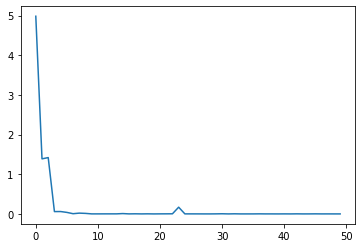

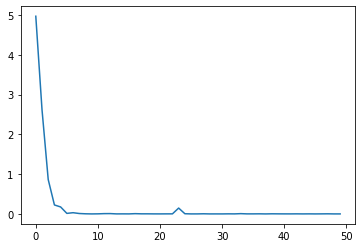

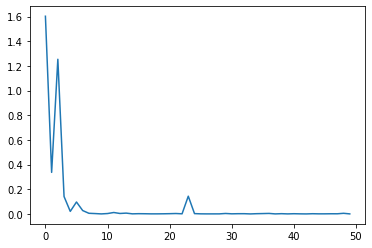

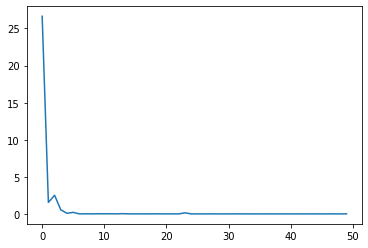

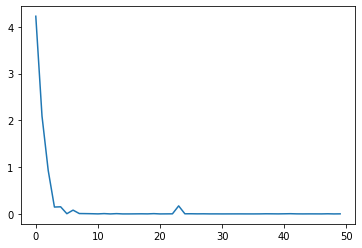

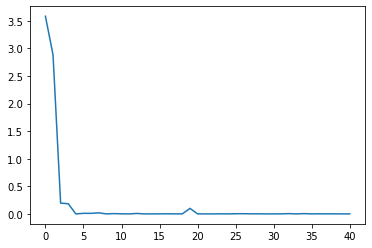

In [70]:
for f in fft:

    plt.plot(np.absolute(f[1:f.shape[0]//2+1])**2)
    plt.show()

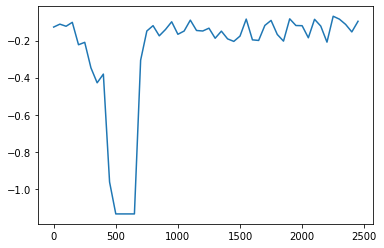

In [68]:
def windowed_mean(signal, window):
    out = []
    for i in range(len(signal)//window + 1):
        out.append(sum(signal[i*window: (i+1)*window])/window)
        
    return out

win_len = 50
win_mean = windowed_mean(data[0].v.to_numpy(), win_len)

x = np.arange(0, data[0].v.to_numpy().shape[0], win_len)
plt.plot(x, win_mean)

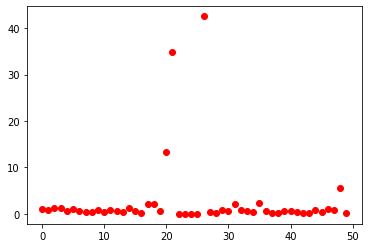

In [77]:
def windowed_sum_signal(signal, window):
    out = []
    for i in range(len(signal)//window + 1):
        out.append(np.sum(np.absolute(np.fft.fft(signal[i*window: (i+1)*window])[1:window//2+1])**2))
    return out

win_len = 50
sig_mean = windowed_sum_signal(data[1].v.to_numpy(), win_len)



plt.plot(sig_mean, 'ro')